In [74]:
## Importing various libraries

import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## sklearn Imports

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Keras Imports

from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils.np_utils import to_categorical
from keras.initializers import RandomNormal  #or xaiver/Hae normilization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.callbacks import LearningRateScheduler

In [75]:
# For plotting models

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [76]:
## For plotting confusion maps

def plot_confusion(confusion):

    for i in range(10):
        confusion[i][i] = 0
    
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion,annot=True, linewidth = 1 , cmap="hot")

In [77]:
## Loading MNIST dataset

dataset = mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [78]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


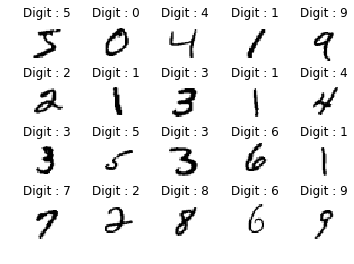

In [79]:
## Peeking at data

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(Y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [80]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [81]:
# Normalizing the dataset by dividing values by 255 to convert the usual 0 to 256 pixel value to 0 to 1

X_train = X_train/255
X_test = X_test/255

# One-Hot incoding.
# This way numbers will be converted to an array of 0's with one 1 at the index of whatever number it originally was
# E.G.: 3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [82]:
# Sizes

input_dim = X_train.shape[1]
output_dim = 10
batch_size = 128
epochs_num = 30
models_num = 9

## Models tested

## BatchNormalization

In [83]:
model_A = Sequential()

model_A.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_A.add(BatchNormalization())
model_A.add(Dense(32, activation='sigmoid'))
model_A.add(BatchNormalization())
model_A.add(Dense(10, activation='softmax'))
model_A.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
model_B = Sequential()

model_B.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_B.add(BatchNormalization())
model_B.add(Dense(32, activation='sigmoid'))
model_B.add(BatchNormalization())
model_B.add(Dense(10, activation='softmax'))
model_B.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [85]:
model_C = Sequential()

model_C.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_C.add(BatchNormalization())
model_C.add(Dense(32, activation='relu'))
model_C.add(BatchNormalization())
model_C.add(Dense(10, activation='softmax'))
model_C.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [86]:
model_D = Sequential()   

model_D.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_D.add(BatchNormalization())
model_D.add(Dense(32, activation='relu'))
model_D.add(BatchNormalization())
model_D.add(Dense(10, activation='softmax'))
model_D.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

## Both

In [87]:
model_K = Sequential()

model_K.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_K.add(BatchNormalization())
model_K.add(Dropout(0.5))
model_K.add(Dense(32, activation='relu'))
model_K.add(BatchNormalization())
model_K.add(Dropout(0.5))
model_K.add(Dense(10, activation='softmax'))
model_K.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## None

In [88]:
model_M = Sequential()

model_M.add(Dense(64, activation='sigmoid', input_shape=(input_dim,)))
model_M.add(Dense(32, activation='sigmoid'))
model_M.add(Dense(10, activation='softmax'))
model_M.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [89]:
model_O = Sequential()

model_O.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_O.add(Dense(32, activation='relu'))
model_O.add(Dense(10, activation='softmax'))
model_O.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [90]:
model_P = Sequential()   

model_P.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_P.add(Dense(32, activation='relu'))
model_P.add(Dense(10, activation='softmax'))
model_P.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [91]:
model_Q = Sequential()

model_Q.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model_Q.add(Dense(32, activation='sigmoid'))
model_Q.add(Dense(10, activation='softmax'))
model_Q.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [92]:
## Making true results from Y_test back to a string

true_results = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    true_results[i] = int(index_of_y_test[0])

In [93]:
# Function to decrease learning rate by 0.95 each epoch
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# For saving results and fitting history
history = [0] * models_num
results = [0] * models_num

## Training MLP's individually & Display Accuracies + Confusion map

Test score: 0.11454562842845917
Test accuracy: 0.9747999906539917


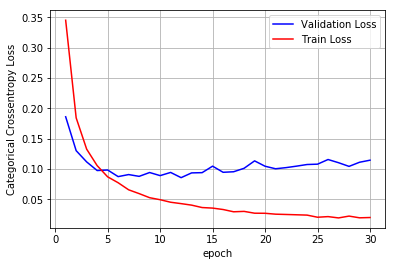

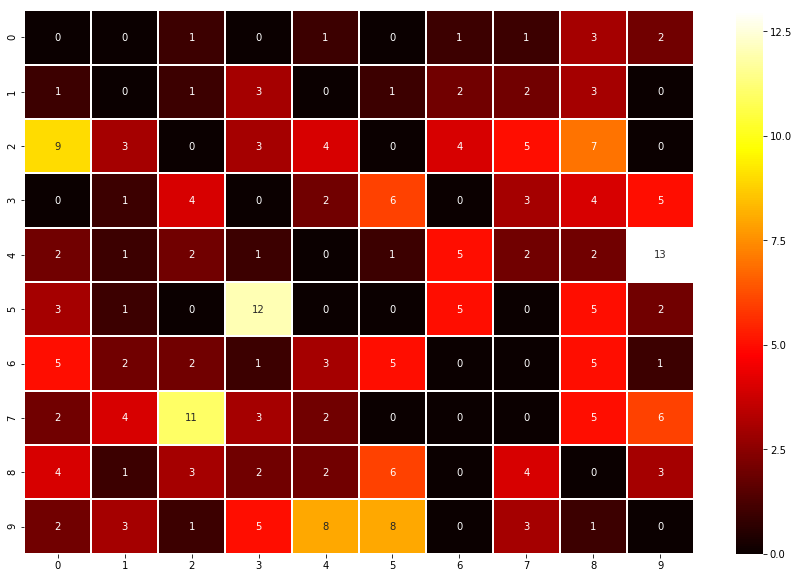

In [94]:
start_time = time.time()

history[0] = model_A.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[0] = model_A.predict(X_test)
results2 = np.argmax(results[0],axis = 1)
score = model_A.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[0].history['val_loss']
ty = history[0].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.0883619412779808
Test accuracy: 0.9735000133514404


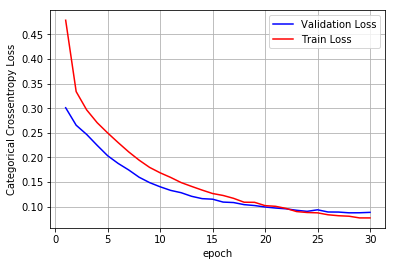

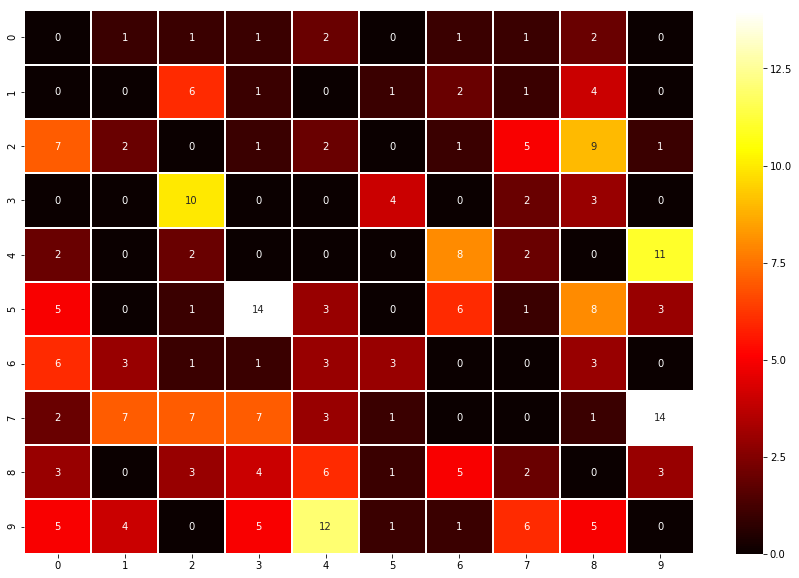

In [95]:
history[1] = model_B.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[1] = model_B.predict(X_test)
results2 = np.argmax(results[1],axis = 1)
score = model_B.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[1].history['val_loss']
ty = history[1].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.10435351729393005
Test accuracy: 0.9761999845504761


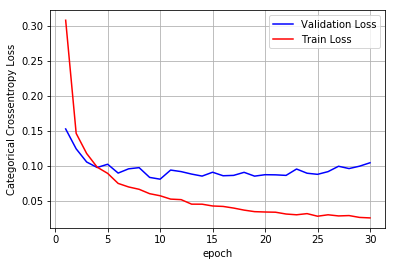

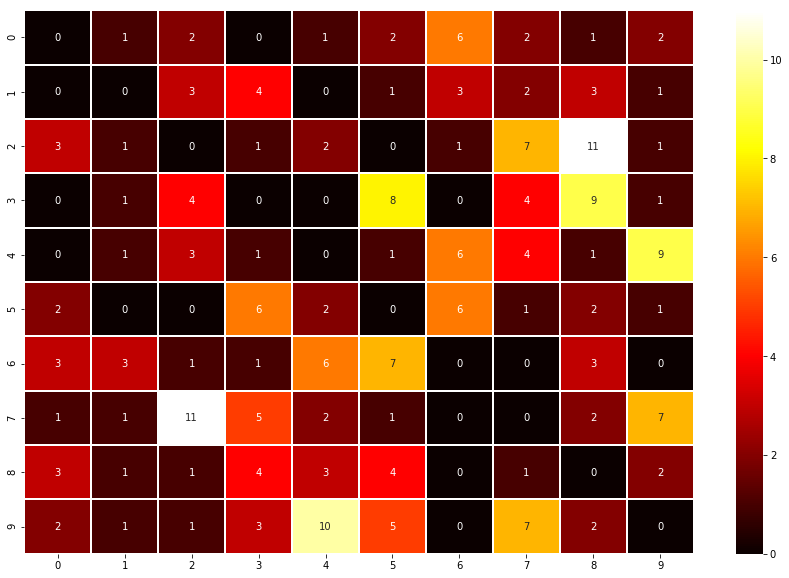

In [96]:
history[2] = model_C.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[2] = model_C.predict(X_test)
results2 = np.argmax(results[2],axis = 1)
score = model_C.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[2].history['val_loss']
ty = history[2].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08041994273662567
Test accuracy: 0.9758999943733215


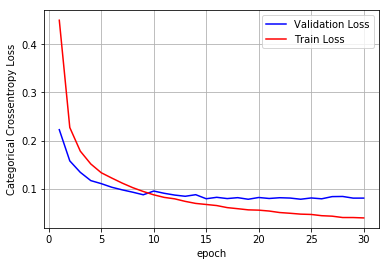

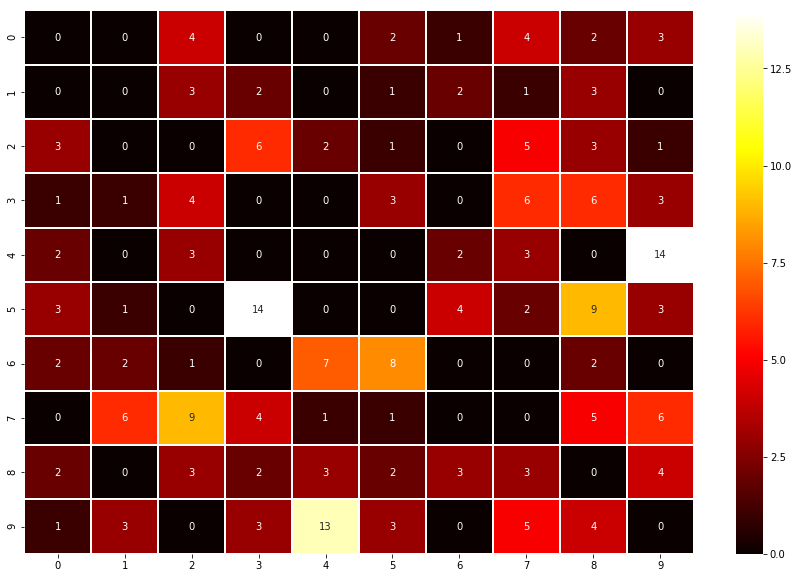

In [97]:
history[3] = model_D.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[3] = model_D.predict(X_test)
results2 = np.argmax(results[3],axis = 1)
score = model_D.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[3].history['val_loss']
ty = history[3].history['loss']
plt_dynamic(x, vy, ty, ax)

confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.12397798895835876
Test accuracy: 0.9638000130653381


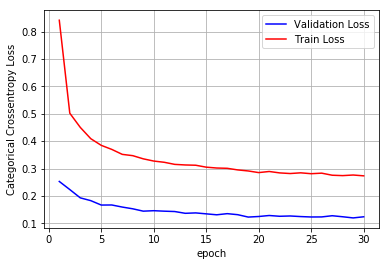

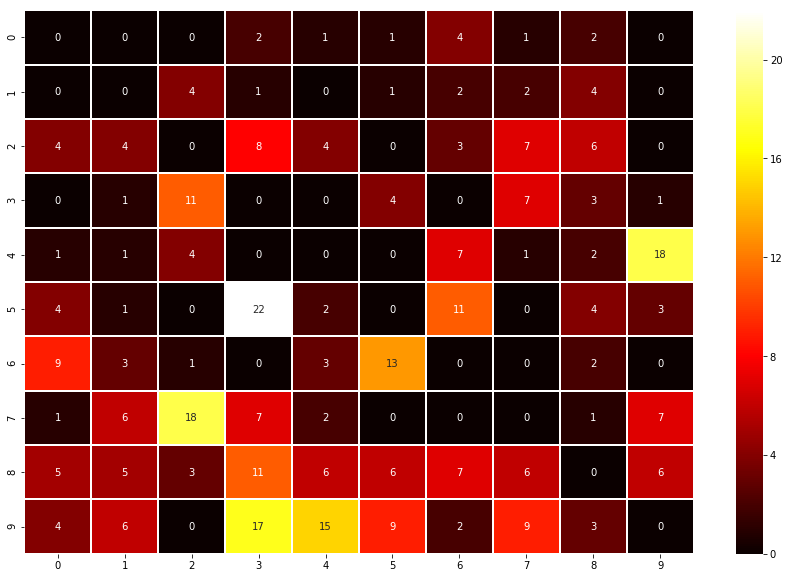

In [98]:
start_time = time.time()

history[4] = model_K.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[4] = model_K.predict(X_test)
results2 = np.argmax(results[4],axis = 1)
score = model_K.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[4].history['val_loss']
ty = history[4].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.12842948734760284
Test accuracy: 0.97079998254776


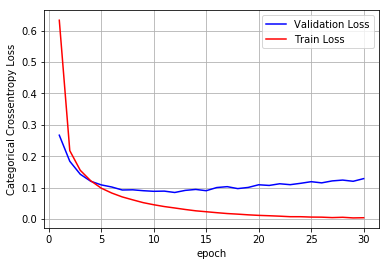

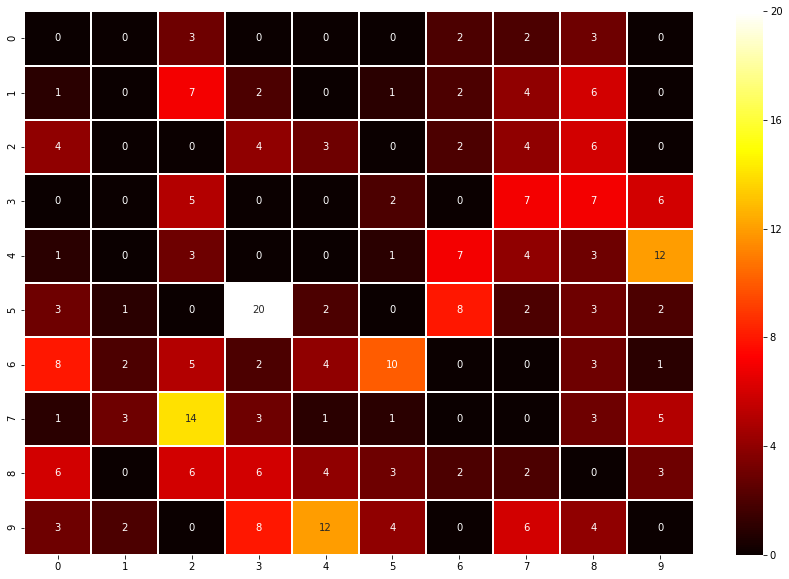

In [99]:
start_time = time.time()

history[5] = model_M.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[5] = model_M.predict(X_test)
results2 = np.argmax(results[5],axis = 1)
score = model_M.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[5].history['val_loss']
ty = history[5].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.16775642335414886
Test accuracy: 0.9739000201225281


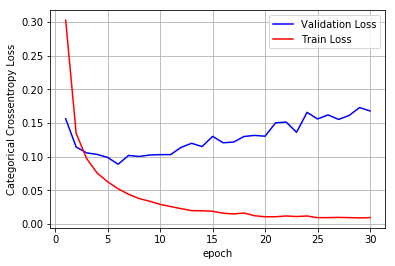

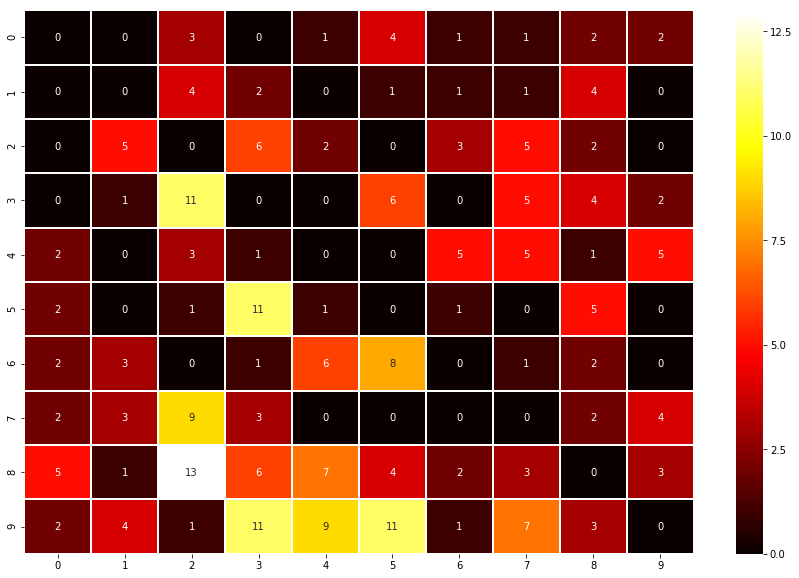

In [100]:
start_time = time.time()

history[6] = model_O.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[6] = model_O.predict(X_test)
results2 = np.argmax(results[6],axis = 1)
score = model_O.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[6].history['val_loss']
ty = history[6].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.08764397352933884
Test accuracy: 0.9728999733924866


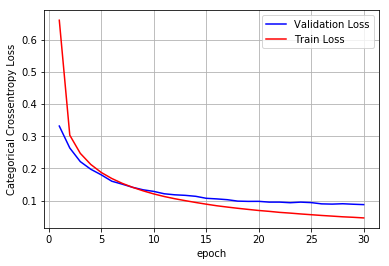

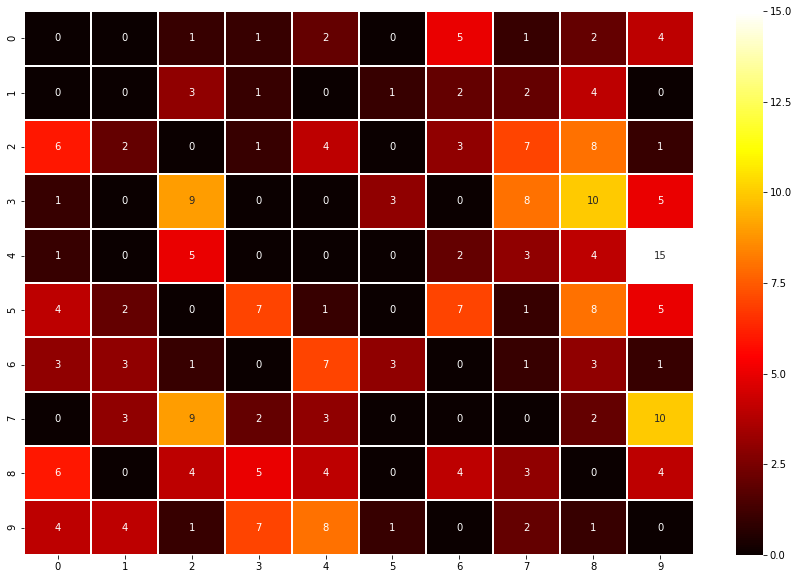

In [101]:
start_time = time.time()

history[7] = model_P.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[7] = model_P.predict(X_test)
results2 = np.argmax(results[7],axis = 1)
score = model_P.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[7].history['val_loss']
ty = history[7].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

Test score: 0.1264081448316574
Test accuracy: 0.9732999801635742


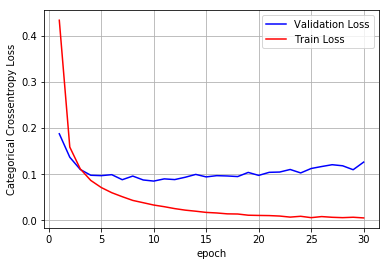

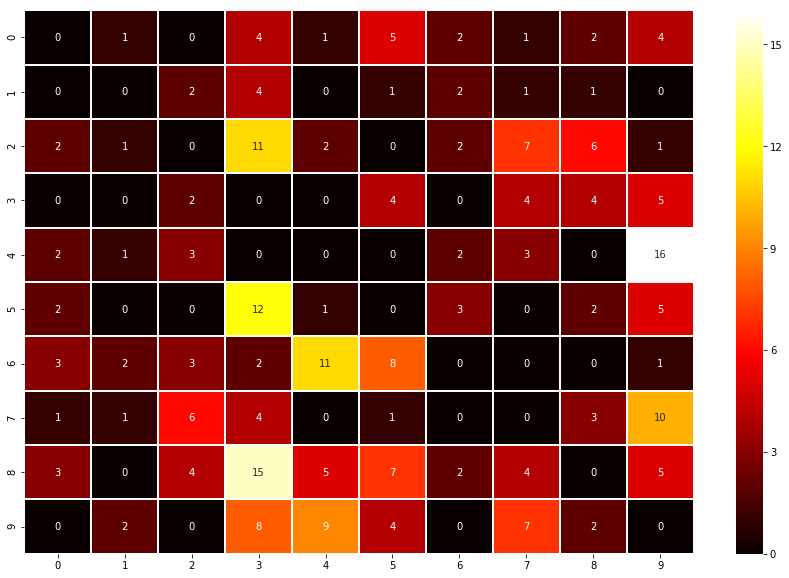

In [102]:
start_time = time.time()

history[8] = model_Q.fit(X_train, Y_train, epochs=epochs_num, verbose=0, validation_data=(X_test, Y_test))
results[8] = model_Q.predict(X_test)
results2 = np.argmax(results[8],axis = 1)
score = model_Q.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs_num+1))

vy = history[8].history['val_loss']
ty = history[8].history['loss']
plt_dynamic(x, vy, ty, ax)


confusion_0 = confusion_matrix(true_results, results2)
plot_confusion(confusion_0)

## Ensemble of previous models

In [103]:
# Predict numbers from with ensemble

results2 = np.zeros( (X_test.shape[0],10) )
for j in range(models_num):
    results2 = results2 + results[j]
results2 = np.argmax(results2,axis = 1)
 
# Calculate Accuracy

c=0
for i in range(10000):
    index_of_y = np.where(Y_test[i] == 1)
    if results2[i]!=int(index_of_y[0]):
        c +=1
print("Ensemble Accuracy = %f" % (1-c/10000.))

Ensemble Accuracy = 0.983400


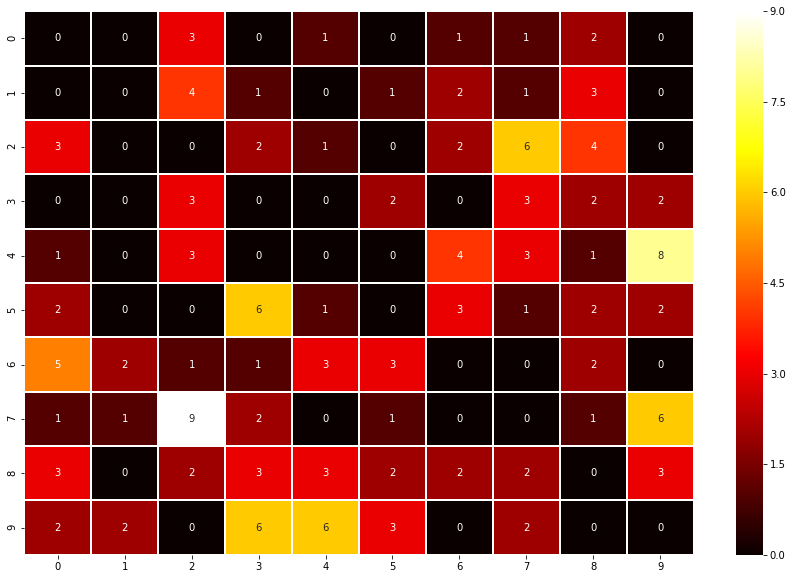

In [104]:
# Confusion map from ensemble

true_results = np.zeros(X_test.shape[0])

for i in range(10000):
    index_of_y_test = np.where(Y_test[i] == 1)
    true_results[i] = int(index_of_y_test[0])
    
    
confusion_ensemble = confusion_matrix(true_results, results2)

plot_confusion(confusion_ensemble)